<h1>SuperMart Product Recommendation App</h1>
<h4>Cedric Green - Computer Science Capstone WGU<h4>
<p> Product Recommendation Interface for SuperMart. This is ultimately a working prototype, so it will not be as pretty as a production application. The core functionality is available and this application could be modified to refine the final application. The script that follows represents the main visual of what the interface is going to accomplish. The first process is obtaining an item of interest from the user. Since this is content based filtering, we do not understand at the moment what the user likes. To kickstart our machine learning application our prescriptive method will require initial input of what the user 'might' be interested in. From here we can compare the similarities using machine learning to offer the top 10 items within our product list that will align closely with the user's interests. </p>

SuperMart Product Recommendation Interface
------------------------------------------------
Please enter a name of an item you may be interested in and we will provide SuperMart product recommendations for
you (example -> Boots):disney

Finding items similar to: Disney


Top 10 Product Recommendations for Disney

Similarity % 1.0  -> 1.) Disney DW100230 Digital Watch  - For Boys, Girls
Similarity % 0.8  -> 2.) Disney DW100405 Digital Watch  - For Boys
Similarity % 0.75  -> 3.) Q&Q LLA2-213 Digital Watch  - For Boys, Girls
Similarity % 0.75  -> 4.) Disney 98189 Analog Watch  - For Boys, Girls
Similarity % 0.75  -> 5.) Marvel DW100243 Digital Watch  - For Boys, Girls
Similarity % 0.75  -> 6.) Zoop C4040PP03 Digital Watch  - For Boys, Girls
Similarity % 0.71  -> 7.) Disney MSFR190-01B Analog Watch  - For Boys, Girls
Similarity % 0.71  -> 8.) Only Kidz 20600 Digital Watch  - For Boys, Girls
Similarity % 0.71  -> 9.) Only Kidz 20368 Digital Watch  - For Boys, Girls
Similarity % 0.67  -> 10.

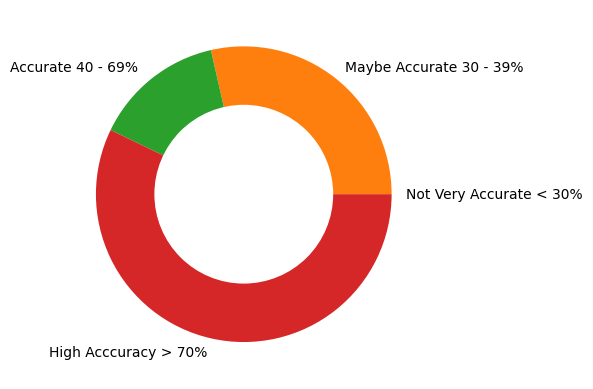

In [18]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

df = pd.read_csv("flipkart.csv")

# Title window
print("SuperMart Product Recommendation Interface\n------------------------------------------------")

# Data Preprocessing

features = ['product_name', 'description', 'brand','product_category_tree', 'overall_rating']

for feature in features:
	df[feature] = df[feature].fillna('')
    
#function  make single feature

def feat_comb(row):
    try:
        if row['overall_rating'] == 'No rating available':
            row['overall_rating'] = '0'
            
        return row['product_name'] + " " + row['brand'] + " " + row['product_category_tree'][2 : row['product_category_tree'].index('>')] + " " + row['overall_rating']
    except:
         if row['overall_rating'] == 'No rating available':
            row['overall_rating'] = '0'
            
         return row['product_name'] + " " + row['brand'] + " " + row['product_category_tree'] + " " + row['overall_rating']


	
df['combined'] = df.apply(feat_comb, axis = 1)


#extract features
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined'])

cosine_sim = cosine_similarity(count_matrix)


user_entry = input('Please enter a name of an item you may be interested in and we will provide ' + 
                   'SuperMart product recommendations for\nyou (example -> Boots):')
user_entry = user_entry.replace(user_entry[0], str.upper(user_entry[0]), 1)

def get_index_from_entry(entry):
        
    print("\nFinding items similar to: " + entry)
    
    for iter in df['product_name']:
        if entry in iter:
            return df.index[df['product_name'] == iter].values[0]   
	

u_index = get_index_from_entry(user_entry)

if u_index == None:
    print(f"Unable to recommend using {user_entry}. No similar items exist. Please run app again and try something more common.")
else:
    

    similar_products = list(enumerate(cosine_sim[u_index]))

    sorted_similar_products = sorted(similar_products, key=lambda x:x[1], reverse=True)

    def get_name_from_index(index):
        return df[df.index == index]['product_name'].values[0]

    print(f"\n\nTop 10 Product Recommendations for {user_entry}\n")
    
    plot_points = []
    
    i=0
    for prod in sorted_similar_products:
        print(f"Similarity % {round(prod[1], 2)}  -> {i + 1}.) {get_name_from_index(prod[0])}")
        plot_points.append(round(prod[1], 2))
        i=i+1
        if i>9:
            break
    plot_points = [*set(plot_points)]
    
    #now that we have the set of plot points iterate through and calculate 
    final_buckets = [0, 2, 0, 0]
    a_labels = ["Not Very Accurate < 30%", "Maybe Accurate 30 - 39% ", "Accurate 40 - 69% ", "High Acccuracy > 70%"]
    
    for x in range(len(plot_points)):
        if plot_points[x]< 30/100:
            final_buckets[0] += 1
        elif plot_points[x] >= 30/100 and plot_points[x] < 40/100:
            final_buckets[1] += 1
        elif plot_points[x] >= 40/100 and plot_points[x] < 70/100:
            final_buckets[2]+= 1
        else:
            final_buckets[3] += 1
    
    plt.pie(final_buckets, labels=a_labels)
    
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.6, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    plt.show()
     
    


The Descriptive model shown above lets us know how the model is performing at any given time. The data outlined is organized to show us the accuracy of the machine learning algorithm. The results classify and categorize the similarity rankings of the final result across 4 containers. If results are not satisfactory for business performance we can easily extend further training on the model to optimize the results or fine tune the model in one direction or another. Having the descriptive performance display will allow us to determine strengths and weaknesses as we work to increase sales.